<a href="https://colab.research.google.com/github/pushpavanthar/EVA/blob/master/Project_1/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

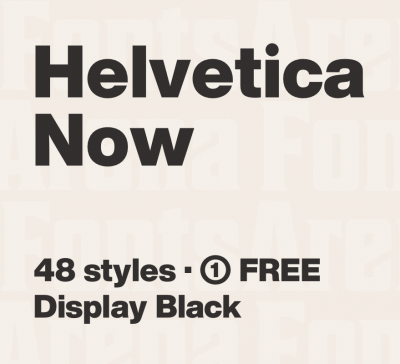

In [42]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

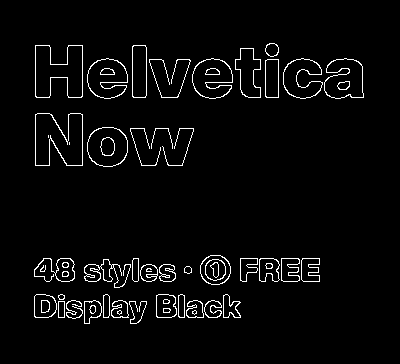

In [44]:
cv2_imshow(edges)

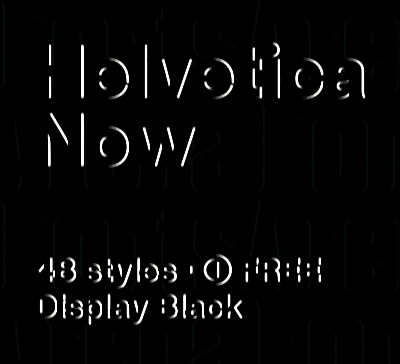

In [45]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

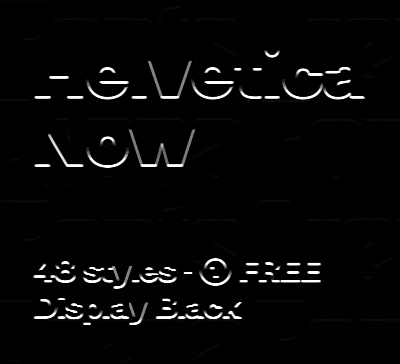

In [46]:
# Horizontal Edge Detector
kernel_horizonatal = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst_horizonatal = cv2.filter2D(image,-1,kernel_horizonatal)
cv2_imshow(dst_horizonatal)

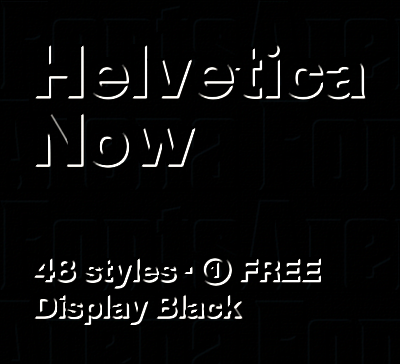

In [57]:
#45 Degree Angle Detector (either)
kernel_angle = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]])

dst_angle = cv2.filter2D(image,-1,kernel_angle)
cv2_imshow(dst_angle)

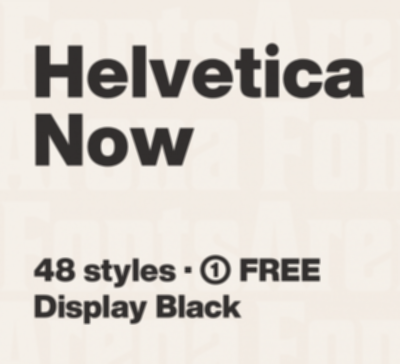

In [48]:
#Blur Kernel
kernel_blurr = 1/9 * np.float32([[1,1,1],[1,1,1],[1,1,1]])

dst_blurr = cv2.filter2D(image,-1,kernel_blurr)
cv2_imshow(dst_blurr)

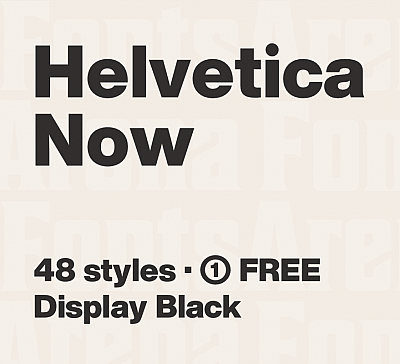

In [51]:
#Sharpen Kernel
kernel_identity = 1/9 * np.float32([[1,1,1],[1,1,1],[1,1,1]])
kernel_smoothed = np.float32([[0,0,0],[0,2,0],[0,0,0]])
kernel_details = kernel_smoothed - kernel_identity
#image = url_to_image("https://npg.si.edu/exhibit/feature/images/schoeller_full.jpg")
dst_sharpen = cv2.filter2D(image,-1, kernel_details)
cv2_imshow(dst_sharpen)

A sharpening kernel can be broken down into two steps:
1.   It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image
2.   adds the "details" to the original image



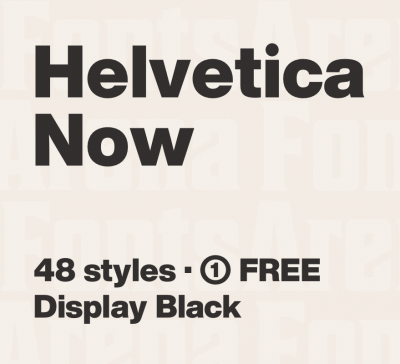

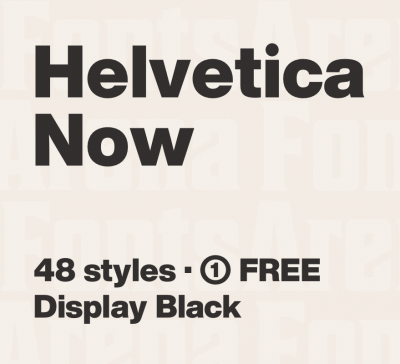

In [55]:
#Identity function (doesn't do anything)

kernel_identity = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst_identity = cv2.filter2D(image,-1, kernel_identity)
cv2_imshow(dst_identity)